# The Diffusion problem: The heat equation

## Questions imposed by the problem
- What is the final solution profile for 1D Diffusion when the initial conditions are a $\textbf{square wave}$ and the boundary conditions are $\textbf{constant}$ ?

- The 1D diffusion phenomena is described by the following equation:

\begin{equation}
\frac{\partial u}{\partial t} = \nu\frac{\partial^2 u}{\partial x^2}
\end{equation}

### Diffusion meaning
- Diffusion is a process resulting from random motion of molecules by which there is a net flow of matter from a region of high concentration to a region of low concentration. A familiar example is the perfume of a flower that quickly permeates the still air of a room.
- Examples:
    - Heat conduction in fluids involves thermal energy transported, or diffused, from higher to lower temperature. 
    - Operation of a nuclear reactor involves the diffusion of neutrons through a medium that causes frequent scattering but only rare absorption of neutrons.
- Note: $\nu$ > 0 for physical diffusion while $\nu$ < 0 would represent an exponentially growing phenomenon, e.g. an explosion or ‘the rich get richer’ model in economy.

- The physics of diffusion are:
    - An expotentially damped wave in time.
    - Isotropic in space - the same in all spatial directions - it does not distinguish between upstream and downstream.

- The phenomenon of diffusion is isotropic - so the finite difference formula that represents that physics is central differencing CD, because CD takes values from upstream and downstream equally.

## Formulate the problem

### Input Data

- nt = 51 (number of temporal points)

- nx = 21 (number of spatial points)

- tmax = 0.5

- xmax = 2

- $\nu$ = 0.1

- We require a square wave as initial condition:
    - Initial conditions:  
    \begin{equation}
    u(x, t = 0) = \left\{\begin{matrix} 2 & 0.5 \leq x \leq 1\\  1 & \textrm{else} \end{matrix}\right.
    \end{equation}
    
    - Boundary conditions: 
    \begin{equation}
    u(x = \{0,2\}, t) = 1.0
    \end{equation}

### Output data

We want to compute the solution $u(x,t)$ elsewhere.

## Algorithm for problem solving

### Numerical scheme (FTCS)
- Forward diffrence in Time
- Centered difference in Space

### Discretization and Transposition
\begin{equation}
\frac{u^{n+1}_{i} - u^{n}_{i}}{\Delta t} + \nu\:\frac{u^{n}_{i+1} - 2 u^{n}_{i} + u^{n}_{i-1}}{\Delta x^2} = 0
\end{equation}
After transposition, we get:
\begin{equation}
u^{n+1}_{i} = u^{n}_{i} - \nu \frac{\Delta t}{\Delta x^2}\left (u^{n}_{i+1} - 2 u^{n}_{i} + u^{n}_{i-1}  \right )
\end{equation}

### Pseudo Code

In [ ]:
# Define Constants:
nt = 51
nx = 21 
tmax = 0.5
xmax = 2
nu = 0.1

dx = xmax/(nx-1)
dt = tmax/(nt-1)

sigma = nu*dt/dx**2

# Boundary conditions:
for between 0 and nt-1; u(0, t) = u(2, t) = 1.0

# Initial conditions:
for i between 0 and nx-1; 
    if 0.5 <= x <= 1.0; u(x, 0) = 2.0
    else; u(x,0) = 1.0

# Solution:
for n between 0 and nt-1;
    for i between 1 and nx-2;
        u(n+1, i) = u(n, i) + sigma*(u(n, i+1) - 2*u(n, i) + u(n, i-1))

### Python Implementation

In [19]:
def Diffusion_1D(tmax, xmax, nt, nx, nu):
    
    import numpy as np
    
    # Grid parameters 
    dx = xmax/(nx-1)
    dt = tmax/(nt-1)
    x = np.linspace(0, xmax, nx)
    
    # Constants 
    sigma = nu*dt / dx**2
    
    # Definition of solution containers:
    u = np.ones((nt, nx))

    # Initial conditions
    for i in range(nx):
        if (0.5 <= x[i] <= 1.0):
            u[0, i] = 2.0
    
    # Boundary conditions: They are automatically included.
    
    # Solution:
    for n in range(nt-1):
        for i in range(1, nx-1):
            u[n+1, i] = u[n, i] + sigma*(u[n, i+1] - 2*u[n, i] + u[n, i-1])
    
    return x, u

In [20]:
def Plotter(x, u, tmax, xmax, nx, nt, nu, iteration = 0):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    Sigma =  nu*dt / dx**2 
    Sigma = float(round(Sigma, 3))
    
    t = iteration*dt
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t = {:})".format(t))
    ax.plot(x, u[iteration, :], label = "Numerical Solution, Sigma = {:}".format(Sigma))
    
    
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

### Many instances plotter:

In [25]:
def Plotter_2(x, u, tmax, xmax, nx, nt, nu):
    
    import numpy as np
    import matplotlib.pyplot as plt

    dx = xmax / (nx-1)
    dt = tmax / (nt-1)
    
    Sigma =  nu*dt / dx**2 
    Sigma = float(round(Sigma, 3))
    
    fig, ax = plt.subplots(figsize = [8.5, 5.8])
    
    Nb = int(nt/10)
    for iteration in range(0, nt, Nb):
        
        t = iteration*dt
        t = float(round(t, 2))
        
        ax.plot(x, u[iteration, :], label = "t = {:}".format(t))
    
    ax.set_title("Numerical solution for Sigma = {:}".format(Sigma))
    ax.set_xlim(0.0, xmax)
    ax.set_xlabel("x(SI)")
    ax.set_ylabel("u(x,t)")
    plt.legend(loc = 'best')
    plt.grid(True)
    plt.show()

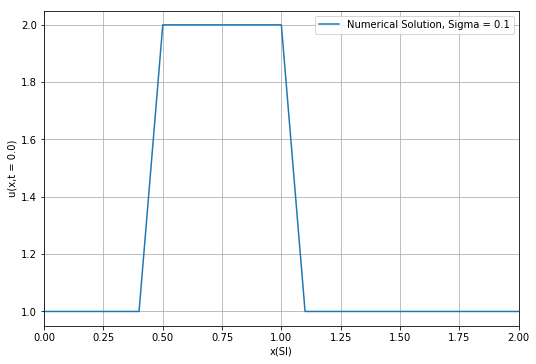

In [26]:
(tmax, xmax, nt, nx, nu) = (0.5, 2.0, 51, 21, 0.1)
x, u = Diffusion_1D(tmax, xmax, nt, nx, nu)
Plotter(x, u, tmax, xmax, nx, nt, nu, iteration = 0)

## Comments
- As we can see, the initial conditions are not a perfect square wave as the number of spatial points is minimal in the scheme !

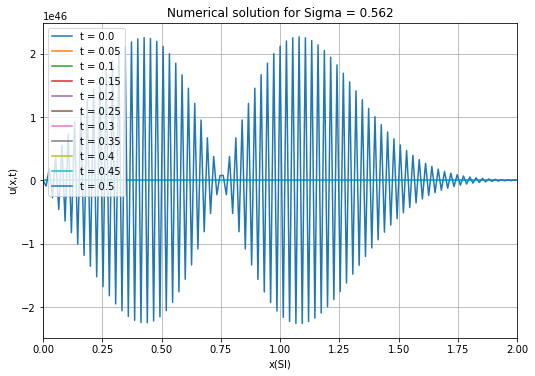

In [32]:
(tmax, xmax, nt, nx, nu) = (0.5, 2.0, 501, 151, 0.1)
x, u = Diffusion_1D(tmax, xmax, nt, nx, nu)
Plotter_2(x, u, tmax, xmax, nx, nt, nu)

## Comments
- The solution is unstable, this is because the Sigma number exceeds one half !

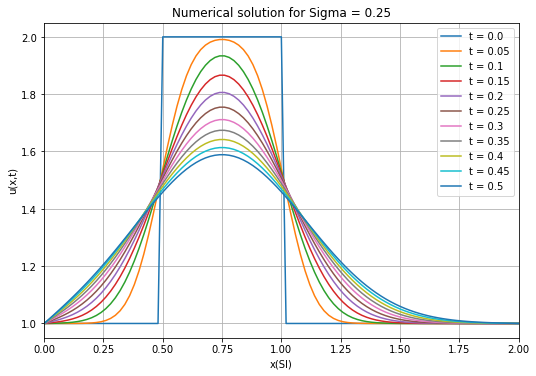

In [38]:
(tmax, xmax, nt, nx, nu) = (0.5, 2.0, 501, 101, 0.1)
x, u = Diffusion_1D(tmax, xmax, nt, nx, nu)
Plotter_2(x, u, tmax, xmax, nx, nt, nu)

## Comments
- When the spatial step is reduced (Number of grid points increased), the error reduces ! and when Sigma is below one half, the scheme becomes stable !
- A perfect solution is obtained when the Sigma number is One half.
\begin{equation}
\nu \frac{\Delta t}{\Delta x^2} = 1/2
\end{equation}

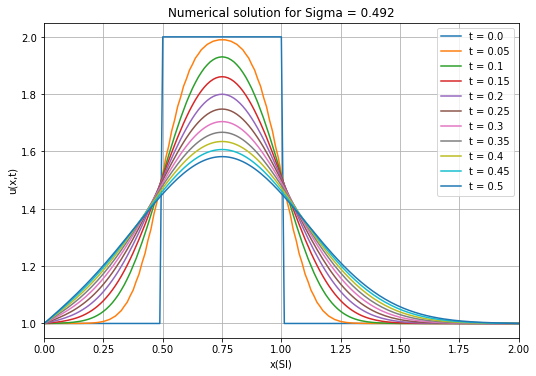

In [59]:
(tmax, xmax, nt, nx, nu) = (0.5, 2.0, 651, 161, 0.1)
x, u = Diffusion_1D(tmax, xmax, nt, nx, nu)
Plotter_2(x, u, tmax, xmax, nx, nt, nu)